# Python Group Assignment
### Topic: Electric Vehicle Population Prediction Analysis


# Task 1. Data Preprocessing

## 1.2 Data Acquisition

In [156]:
# Import library required
import pandas as pd
import numpy as np

In [157]:
# Load the CSV dataset into Python environment
df = pd.read_csv('ev.csv')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150509 entries, 0 to 150508
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150509 non-null  object 
 1   County                                             150506 non-null  object 
 2   City                                               150506 non-null  object 
 3   State                                              150509 non-null  object 
 4   Postal Code                                        150506 non-null  float64
 5   Model Year                                         150509 non-null  int64  
 6   Make                                               150509 non-null  object 
 7   Model                                              150509 non-null  object 
 8   Electric Vehicle Type                              150509 non-null  object

## 1.3 Data Cleaning and Preprocessing

### A. Missing Values

In [159]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 342
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [160]:
# Remove rows with any missing valus
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150163 entries, 0 to 150508
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150163 non-null  object 
 1   County                                             150163 non-null  object 
 2   City                                               150163 non-null  object 
 3   State                                              150163 non-null  object 
 4   Postal Code                                        150163 non-null  float64
 5   Model Year                                         150163 non-null  int64  
 6   Make                                               150163 non-null  object 
 7   Model                                              150163 non-null  object 
 8   Electric Vehicle Type                              150163 non-null  object 
 9 

In [161]:
# Recheck for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


### B. Duplicates

In [162]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 26


In [163]:
# Remove duplicates rows
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150137 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150137 non-null  object 
 1   County                                             150137 non-null  object 
 2   City                                               150137 non-null  object 
 3   State                                              150137 non-null  object 
 4   Postal Code                                        150137 non-null  float64
 5   Model Year                                         150137 non-null  int64  
 6   Make                                               150137 non-null  object 
 7   Model                                              150137 non-null  object 
 8   Electric Vehicle Type                              150137 non-null  object 
 9 

In [164]:
# Recheck for duplicates
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


### C. Data Inconsistencies

In [165]:
# Show data head
df.head()

# Data inconsistencies found in Postal Code and Model Year (Row 0-3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,981030.0,20200,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,980110.0,0,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,989080.0,20230,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,20,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [166]:
# Solve data inconsistencies problem (part 1)
# Filter out data rows when Postal Code less than 4 digits and over 5 digits
df = df[(df['Postal Code'] > 1000) & (df['Postal Code'] < 100000)]

df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,20,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
5,5YJ3E1EAXL,Snohomish,Marysville,WA,98271.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,38.0,124595523,POINT (-122.1713847 48.10433),PUGET SOUND ENERGY INC,5.306194e+10
6,2C4RC1N77H,King,Kent,WA,98042.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,47.0,1815593,POINT (-122.111625 47.36078),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
7,5YJYGDEE3L,King,Woodinville,WA,98072.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,45.0,124760555,POINT (-122.151665 47.75855),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [167]:
# Solve data inconsistencies problem (part 2)
# Filter out data rows when Model Year less than or over 4 digits
df = df[df['Model Year'].astype(str).str.len() == 4]

df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
5,5YJ3E1EAXL,Snohomish,Marysville,WA,98271.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,38.0,124595523,POINT (-122.1713847 48.10433),PUGET SOUND ENERGY INC,5.306194e+10
6,2C4RC1N77H,King,Kent,WA,98042.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,47.0,1815593,POINT (-122.111625 47.36078),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
7,5YJYGDEE3L,King,Woodinville,WA,98072.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,45.0,124760555,POINT (-122.151665 47.75855),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
8,5YJ3E1EA1J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,125048003,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10


## 1.4 Data Quality Assurance

In [168]:
# Show data summary to ensure no error
print('Data Quality Assurance')
summary = pd.DataFrame({
    'No Error': df.count(),  # Non-null values counts per column
    'Missing Values': df.isnull().sum(),  # Missing values per column
    'Duplicates': df.duplicated().sum()  # Duplicate rows count
})

# Show the summary in table format (more neat)
print(summary.to_string())

Data Quality Assurance
                                                   No Error  Missing Values  Duplicates
VIN (1-10)                                           150133               0           0
County                                               150133               0           0
City                                                 150133               0           0
State                                                150133               0           0
Postal Code                                          150133               0           0
Model Year                                           150133               0           0
Make                                                 150133               0           0
Model                                                150133               0           0
Electric Vehicle Type                                150133               0           0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    150133               0           0
Electric 

## 1.5 Data Transformation

In [169]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150133 entries, 4 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150133 non-null  object 
 1   County                                             150133 non-null  object 
 2   City                                               150133 non-null  object 
 3   State                                              150133 non-null  object 
 4   Postal Code                                        150133 non-null  float64
 5   Model Year                                         150133 non-null  int64  
 6   Make                                               150133 non-null  object 
 7   Model                                              150133 non-null  object 
 8   Electric Vehicle Type                              150133 non-null  object 
 9 

In [170]:
# Filter columns with data type as float
float_columns = df.select_dtypes(include=['float'])

print(float_columns)


        Postal Code  Legislative District  2020 Census Tract
4           98501.0                  22.0       5.306701e+10
5           98271.0                  38.0       5.306194e+10
6           98042.0                  47.0       5.303303e+10
7           98072.0                  45.0       5.303302e+10
8           98239.0                  10.0       5.302997e+10
...             ...                   ...                ...
150477      98563.0                  19.0       5.302700e+10
150478      98104.0                  43.0       5.303301e+10
150479      98109.0                  43.0       5.303301e+10
150480      98043.0                   1.0       5.306105e+10
150481      98273.0                  40.0       5.305795e+10

[150133 rows x 3 columns]


In [171]:
# As seen from results, Postal Code and Legislative District are integers
# Tranform data type from float to integer
df['Postal Code'] = df['Postal Code'].astype('int')
df['Legislative District'] = df['Legislative District'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150133 entries, 4 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150133 non-null  object 
 1   County                                             150133 non-null  object 
 2   City                                               150133 non-null  object 
 3   State                                              150133 non-null  object 
 4   Postal Code                                        150133 non-null  int32  
 5   Model Year                                         150133 non-null  int64  
 6   Make                                               150133 non-null  object 
 7   Model                                              150133 non-null  object 
 8   Electric Vehicle Type                              150133 non-null  object 
 9 

# Task 2

## 2.1 Data Overview

In [172]:
num_rows = len(df)
print("Number of rows(Observation):")
print(num_rows)

num_columns = len(df.columns)
print("Number of columns(Variables):")
print(num_columns)

Number of rows(Observation):
150133
Number of columns(Variables):
17


## 2.2 Data Structure

In [173]:
data_types = df.dtypes
print(data_types)

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                            int32
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                   int32
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

## 2.3 Data Distribution

In [174]:
numeric_columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']
numeric_statistics = df[numeric_columns].describe()
print(numeric_statistics)

         Postal Code    Model Year  Electric Range      Base MSRP  \
count  150133.000000  150133.00000   150133.000000  150133.000000   
mean    98257.884243    2020.00702       67.862302    1311.135893   
std       301.503690       3.01524       96.224037    9224.462708   
min     98001.000000    1997.00000        0.000000       0.000000   
25%     98052.000000    2018.00000        0.000000       0.000000   
50%     98122.000000    2021.00000       18.000000       0.000000   
75%     98370.000000    2023.00000       97.000000       0.000000   
max     99403.000000    2024.00000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         150133.000000    1.501330e+05       1.501330e+05  
mean              29.344321    2.111400e+08       5.303968e+10  
std               14.824798    8.196509e+07       1.615362e+07  
min                1.000000    4.385000e+03       5.300195e+10  
25%               18.000000    1.693919e+08       5.3

In [175]:
categorical_columns = ['VIN (1-10)', 'County', 'State','Make','Model','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Vehicle Location','Electric Utility']
categorical_statistics = df[categorical_columns].describe()
print(categorical_statistics)

        VIN (1-10)  County   State    Make    Model  \
count       150133  150133  150133  150133   150133   
unique        9522      39       1      37      127   
top     7SAYGDEE7P    King      WA   TESLA  MODEL Y   
freq           807   79072  150133   68820    28456   

                 Electric Vehicle Type  \
count                           150133   
unique                               2   
top     Battery Electric Vehicle (BEV)   
freq                            116581   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
count                                              150133   
unique                                                  3   
top     Eligibility unknown as battery range has not b...   
freq                                                69580   

                   Vehicle Location  \
count                        150133   
unique                          537   
top     POINT (-122.12302 47.67668)   
freq                           3869   

           

# Task 3

## 3.1 Data Analysis

In [176]:
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
# Display the first few rows of the dataset
print(df.head())

# Get basic summary statistics
print(df.describe())

# Check data types and missing values
print(df.info())

   VIN (1-10)     County         City State  Postal Code  Model Year  \
4  WBY7Z8C5XJ   Thurston      Olympia    WA        98501        2018   
5  5YJ3E1EAXL  Snohomish   Marysville    WA        98271        2020   
6  2C4RC1N77H       King         Kent    WA        98042        2017   
7  5YJYGDEE3L       King  Woodinville    WA        98072        2020   
8  5YJ3E1EA1J     Island   Coupeville    WA        98239        2018   

       Make     Model                   Electric Vehicle Type  \
4       BMW        I3  Plug-in Hybrid Electric Vehicle (PHEV)   
5     TESLA   MODEL 3          Battery Electric Vehicle (BEV)   
6  CHRYSLER  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
7     TESLA   MODEL Y          Battery Electric Vehicle (BEV)   
8     TESLA   MODEL 3          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
4           Clean Alternative Fuel Vehicle Eligible              97   
5           Clean Alternative Fuel

In [178]:
# Calculate the mean
mean_values = df[numeric_columns].mean()
print("Mean Values:")
print(mean_values)

Mean Values:
Postal Code             9.825788e+04
Model Year              2.020007e+03
Electric Range          6.786230e+01
Base MSRP               1.311136e+03
Legislative District    2.934432e+01
DOL Vehicle ID          2.111400e+08
2020 Census Tract       5.303968e+10
dtype: float64


In [179]:
# Calculate the mode
mode_values = df[categorical_columns].mode()
print("\nMode Values:")
print(mode_values)


Mode Values:
   VIN (1-10) County State   Make    Model           Electric Vehicle Type  \
0  7SAYGDEE7P   King    WA  TESLA  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0  Eligibility unknown as battery range has not b...   

              Vehicle Location                               Electric Utility  
0  POINT (-122.12302 47.67668)  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  


In [188]:
# Calculate the median
median_values = df[numeric_columns].median()
print("\nMedian Values:")
print(median_values)


Median Values:
Postal Code             9.812200e+04
Model Year              2.021000e+03
Electric Range          1.800000e+01
Base MSRP               0.000000e+00
Legislative District    3.300000e+01
DOL Vehicle ID          2.150582e+08
2020 Census Tract       5.303303e+10
dtype: float64


In [182]:
range_values = df[numeric_columns].max() - df.min()
print("\nRange:")
print(range_values)


Range:
2020 Census Tract                                     75989907.0
Base MSRP                                               845000.0
City                                                         NaN
Clean Alternative Fuel Vehicle (CAFV) Eligibility            NaN
County                                                       NaN
DOL Vehicle ID                                       479250387.0
Electric Range                                             337.0
Electric Utility                                             NaN
Electric Vehicle Type                                        NaN
Legislative District                                        48.0
Make                                                         NaN
Model                                                        NaN
Model Year                                                  27.0
Postal Code                                               1402.0
State                                                        NaN
VIN (1-10)       

In [183]:
variance_values = df[numeric_columns].var()
print("\nVariance:")
print(variance_values)


Variance:
Postal Code             9.090448e+04
Model Year              9.091670e+00
Electric Range          9.259065e+03
Base MSRP               8.509071e+07
Legislative District    2.197746e+02
DOL Vehicle ID          6.718275e+15
2020 Census Tract       2.609395e+14
dtype: float64


In [184]:
std_dev_values = df[numeric_columns].std()
print("\nStandard Deviation:")
print(std_dev_values)


Standard Deviation:
Postal Code             3.015037e+02
Model Year              3.015240e+00
Electric Range          9.622404e+01
Base MSRP               9.224463e+03
Legislative District    1.482480e+01
DOL Vehicle ID          8.196509e+07
2020 Census Tract       1.615362e+07
dtype: float64


## 3.2 Data Visualization

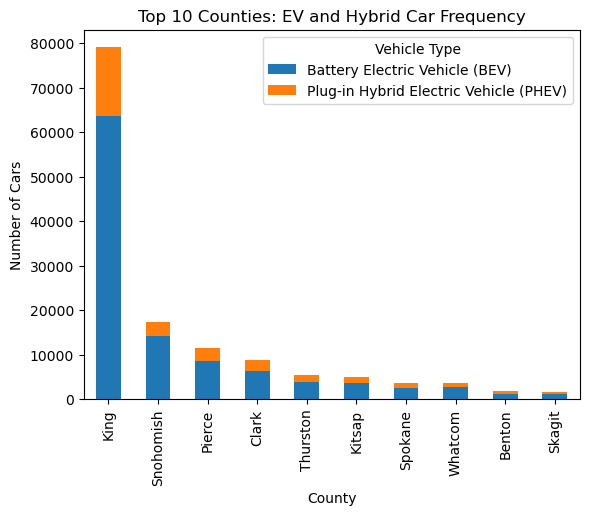

In [185]:
# Count the frequency of EV and hybrid cars in each county
count_by_county = pd.crosstab(df['County'], df['Electric Vehicle Type'])

# Calculate the total number of cars in each county
count_by_county['Total'] = count_by_county.sum(axis=1)

# Sort counties by total number of cars and select the top 10
top_10_counties = count_by_county.sort_values(by='Total', ascending=False).head(10)

# Plot a bar chart for the top 10 counties
top_10_counties.drop(columns='Total').plot(kind='bar', stacked=True)
plt.title('Top 10 Counties: EV and Hybrid Car Frequency')
plt.xlabel('County')
plt.ylabel('Number of Cars')
plt.legend(title='Vehicle Type')
plt.show()

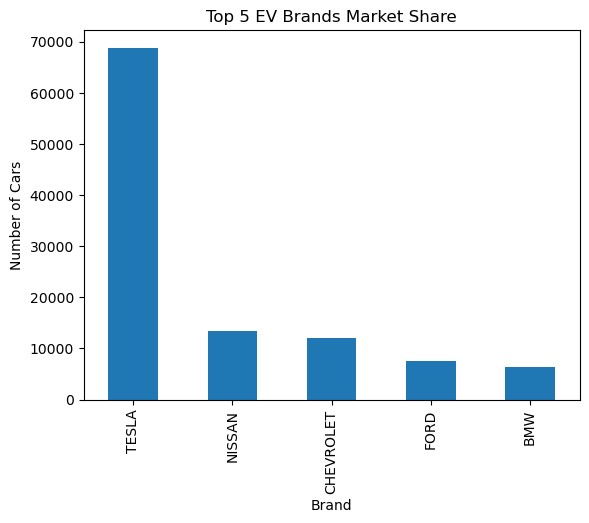

In [186]:
# Count the frequency of each brand
brand_counts = df['Make'].value_counts()

# Select the top 5 brands
top_5_brands = brand_counts.nlargest(5)

# Plot a bar chart
top_5_brands.plot(kind='bar')
plt.title('Top 5 EV Brands Market Share')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.show()

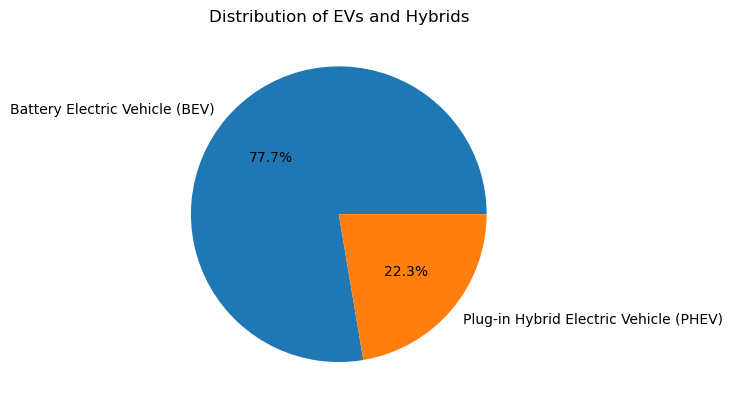

In [187]:
# Count the frequency of each vehicle type
vehicle_type_counts = df['Electric Vehicle Type'].value_counts()

# Plot a pie chart
vehicle_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of EVs and Hybrids')
plt.ylabel('')
plt.show()